# Linear Models


Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

- Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
- Regresión Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Regresión Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
- Finalmente grafica :
-- MAE (de los cuatro métodos)
-- R2 (de los cuatro métodos)
-Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [82]:
#Librerías de regresion lineal
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

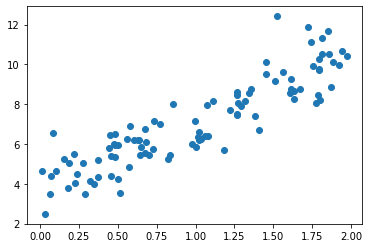

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

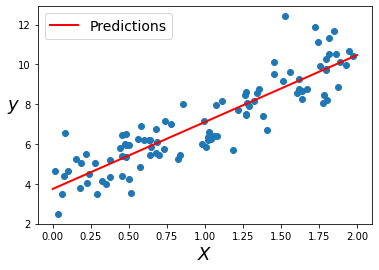

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

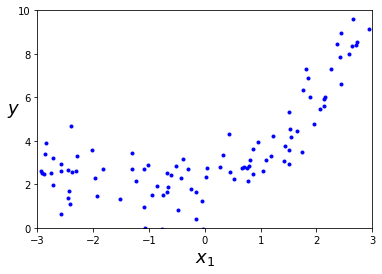

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

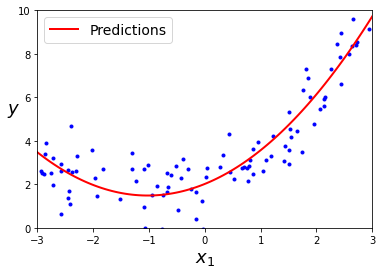

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

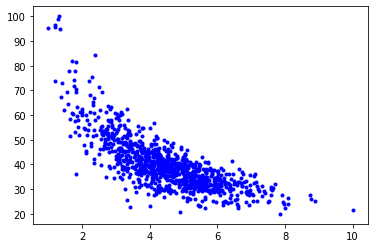

In [26]:
plt.plot(X,y,'b.')

In [27]:
#lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[] 
lista_para_r2 =[] 

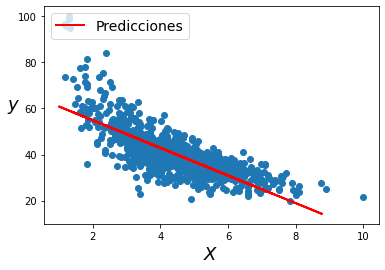

In [28]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test  
y_para_regresion = linear_reg.predict(X_para_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_para_regresion, y_para_regresion, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [29]:
#la ecuacion
linear_reg.coef_, linear_reg.intercept_

#$\hat{y} = -5.98X + 66.83
#La descripcion de la ecuaci[on]
print('El modelo es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

# los errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_para_regresion))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_para_regresion)))

#la r cuadrada
print('r2_score:', r2_score(y_test,y_para_regresion))

El modelo es: Y = [-5.98882699] X + 66.83650741226988
Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 7.108963321847682
r2_score: 0.6116251549562579


In [32]:
#polinomial
caracteristicas_para_poly = PolynomialFeatures(degree=2, include_bias=False) 

X_polinomial = caracteristicas_para_poly.fit_transform(X_train)
print("Input",caracteristicas_para_poly.n_input_features_)
print("Ouput",caracteristicas_para_poly.n_output_features_)
print("Powersn",caracteristicas_para_poly.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) 
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_

Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [33]:
X_polinomial.shape

(900, 2)

In [34]:
X_polinomial_test = caracteristicas_para_poly.fit_transform(X_test)
X_polinomial_test.shape

(100, 2)

In [35]:
y_con_regresion_poli = regresion_lineal_poli.predict(X_polinomial_test)
y_con_regresion_poli.shape

(100,)

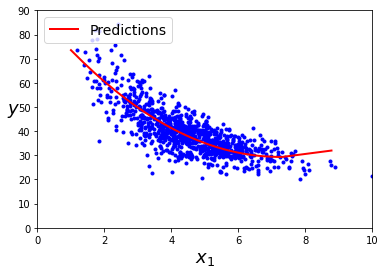

In [36]:

order = np.argsort(X_test.values.ravel()) 

sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_con_regresion_poli[order]

#plt.plot(X_test, y_test, "b.") #Estamos ploteando sobre datos de prueba, pero tambien podemos sobre los de entrenamiento
plt.plot(X, y, "b.")  #Aqui es para que veamos mas a detalle la linea de regresion, todo es cuestion de perspectiva
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [37]:
#Los errores
from sklearn import metrics
from sklearn.metrics import r2_score


print('El modelo es: Y =', regresion_lineal_poli.coef_[1],'X^2 +', regresion_lineal_poli.coef_[0],'X +',regresion_lineal_poli.intercept_)

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)

r2Score = r2_score(y_test, y_con_regresion_poli)

print('Error medio Absoluto (MAE):', metrica_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli)))
print('r2_score',r2Score)

El modelo es: Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425
r2_score 0.7385501224942536


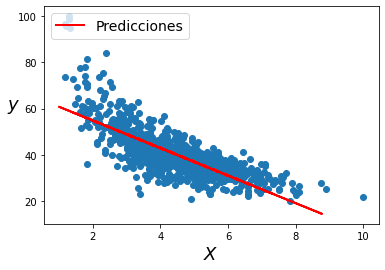

In [39]:
#Ridge
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_ridge = mi_ridge.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_ridge, y_para_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [40]:
#metricas del ridge

mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge) 
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print('Error medio Absoluto (MAE):', metrica_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)

Error medio Absoluto (MAE): 5.016205738992834
Root Mean Squared Error: 7.111111949820097
r2_score 0.6113903530239646
El modelo es: Y = [-5.97003397] X + 66.75243237759665


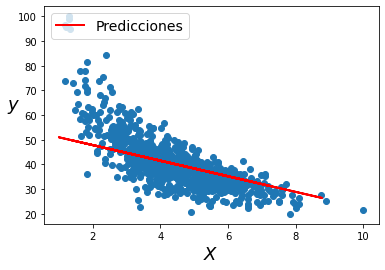

In [41]:
#Lasso
mi_lasso = Lasso(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_lasso.fit(X_train, y_train)
X_para_lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_lasso = mi_lasso.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_lasso, y_para_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [42]:
#Las metricas del lasso

mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
lista_para_mae.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,y_para_lasso)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print('Error medio Absoluto (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_lasso.coef_,'X +', mi_lasso.intercept_)

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score 0.456505036516648
El modelo es: Y = [-3.15572458] X + 54.16195119377412


In [43]:
print(lista_para_mae)
print(lista_para_r2)

[5.013587781954963, 4.3833025759681075, 5.016205738992834, 5.681207654677401]
[0.6116251549562579, 0.7385501224942536, 0.6113903530239646, 0.456505036516648]


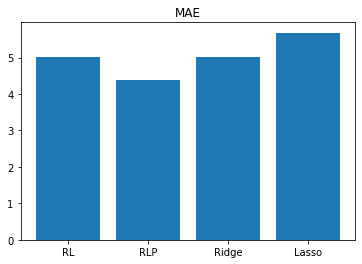

In [44]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae)
plt.title('MAE')
plt.show()


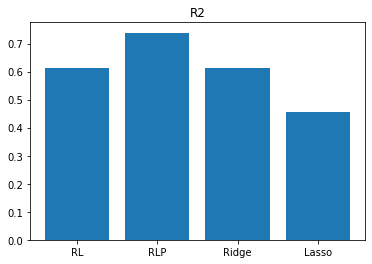

In [45]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_r2)
plt.title('R2')
plt.show()

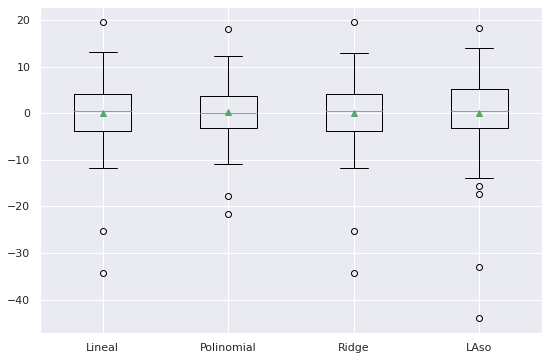

In [46]:
residuo_regresion_simple=y_para_regresion - y_test
residuo_regresion_poliforme= y_con_regresion_poli - y_test
residuo_ridge=y_para_ridge - y_test
residuo_lasso=y_para_lasso - y_test
lista_residuos= [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('LAso')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

NameError: ignored

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12578,7866500035,20140805T000000,299000.0,1,1.00,740,5000,1.0,0,0,...,7,740,0,1923,0,98118,47.5519,-122.292,1400,4400
11050,4039300810,20141117T000000,427000.0,3,1.00,1200,5252,1.0,0,0,...,7,1200,0,1962,0,98007,47.6075,-122.134,1800,7920
17904,8651200040,20140814T000000,950000.0,4,2.50,2790,15653,2.0,0,0,...,10,2790,0,1964,0,98040,47.5477,-122.215,3520,15653
10295,2473460860,20141027T000000,260000.0,4,2.50,2110,8990,2.0,0,0,...,8,2110,0,1977,0,98058,47.4457,-122.127,2040,8800
19682,2523039346,20150218T000000,720000.0,4,3.25,3276,10801,2.0,0,0,...,9,3276,0,2008,0,98166,47.4585,-122.361,2010,11656
13383,9265400210,20140922T000000,227000.0,3,1.75,1510,9837,2.0,0,0,...,7,1510,0,1989,0,98001,47.2576,-122.255,1470,8054
842,9429500045,20140509T000000,428750.0,3,1.00,1620,30736,1.5,0,0,...,7,1620,0,1911,1977,98006,47.5719,-122.119,2440,28826
1444,6137500320,20140625T000000,1229000.0,4,3.50,3770,37034,2.0,0,0,...,10,2830,940,1989,0,98007,47.6463,-122.151,3200,36342
769,1196003428,20140624T000000,405000.0,3,2.50,3170,12750,2.0,0,0,...,10,2360,810,1995,0,98023,47.3384,-122.336,2970,13125
5003,9238480020,20150319T000000,699000.0,5,2.75,2970,36817,2.0,0,0,...,8,2970,0,1978,0,98072,47.7731,-122.139,2730,29150


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [86]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [87]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


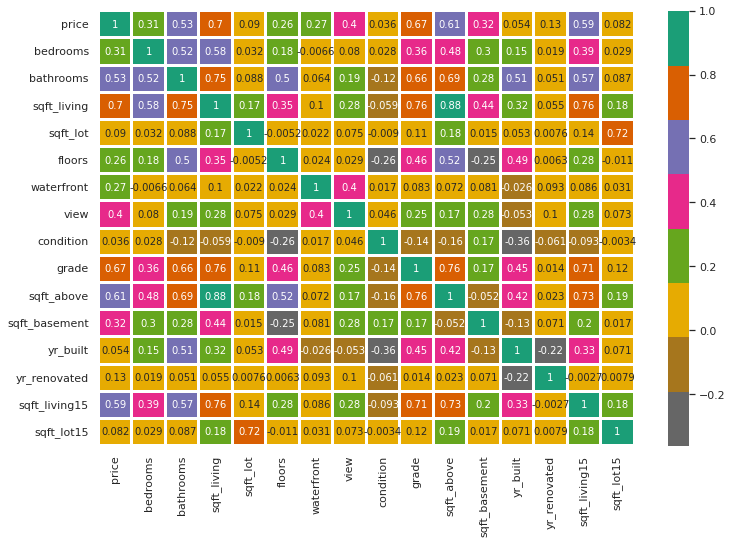

In [88]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [89]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [117]:
lista_para_mae =[] 
lista_para_r2 =[]

In [118]:
# Ridge
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) 
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test  
y_para_ridge = mi_ridge.predict(X_para_ridge)


In [119]:
mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge) 
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print('Error medio Absoluto (MAE):', metrica_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge)))
print('r2_score',r2Score)


Error medio Absoluto (MAE): 137533.65574257117
Root Mean Squared Error: 232291.8879538845
r2_score 0.6575050300500245


In [120]:
#Lasso
mi_lasso = Lasso(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_lasso.fit(X_train, y_train)
X_para_lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_lasso = mi_lasso.predict(X_para_ridge)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [121]:
mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
lista_para_mae.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,y_para_lasso)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print('Error medio Absoluto (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_lasso.coef_,'X +', mi_lasso.intercept_)

Error medio Absoluto (MAE): 137482.30243495223
Root Mean Squared Error: 232139.17278486004
r2_score 0.6579552135202583
El modelo es: Y = [-3.81944532e+04  4.14447318e+04  2.93473442e+02  1.70981121e-02
  3.16689403e+04  5.51941446e+05  4.12775360e+04  2.12083740e+04
  1.19486323e+05 -1.37682477e+02 -1.25253841e+02 -3.55064163e+03
  1.32733439e+01  2.90029354e+01 -5.48149962e-01] X + [6150963.5185376]


In [122]:
# Lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_regresion = linear_reg.predict(X_para_regresion)

In [123]:
linear_reg.coef_, linear_reg.intercept_

#$\hat{y} = -5.98X + 66.83
#La descripcion de la ecuaci[on]
print('El modelo es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

# los errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_para_regresion))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_para_regresion)))

#la r cuadrada
print('r2_score:', r2_score(y_test,y_para_regresion))

El modelo es: Y = [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750272e+01  6.02175566e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]] X + [6151359.26274124]
Error Medio Absoluto (MAE): 137480.13882733323
Error Medio Cuadrado (RMSE): 232133.3676240722
r2_score: 0.6579723205007892


In [124]:
#from sklearn.preprocessing import PolynomialFeatures
#los errores
caracteristicas_para_poly = PolynomialFeatures(degree=2, include_bias=False) #Aqui tenemos que crear las caracteristicas, revisar porque el grado es 2, porque queremos ajustar a un polinomio de segundo raro
#Lo de arriba lo que hace es que los datos originales los va a ir elevando al cuadrado, porque le pusimos 2, pero si juera mas, pues nos va haciendo la potencia
X_polinomial = caracteristicas_para_poly.fit_transform(X_train)
print("Input",caracteristicas_para_poly.n_input_features_)
print("Ouput",caracteristicas_para_poly.n_output_features_)
print("Powersn",caracteristicas_para_poly.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) #Creamos una 
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_

Input 15
Ouput 135
Powersn [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.33879687e+05, -1.09273860e+06, -5.37390428e+02,
         -2.78634102e+01, -2.07489950e+06, -3.95371495e+06,
         -2.88652531e+05,  5.58519576e+05,  1.09862983e+06,
         -1.38818478e+02, -3.01577501e+02, -8.59702783e+04,
         -2.95366775e+03,  3.99963414e+03, -3.40100355e+01,
          9.57586804e+02,  7.49940820e+03, -1.40076562e+01,
         -1.85239669e-02,  8.58010319e+03, -1.14952153e+04,
         -3.08060610e+02, -5.24565914e+03, -5.36863409e+03,
         -9.99978948e-01, -1.43956003e+01, -4.67077597e+02,
         -9.13138297e+00,  1.72800783e+01,  2.15615872e-01,
         -9.63204388e+03,  1.52795786e+01, -1.35647630e-01,
         -2.59102127e+04,  4.33756643e+04,  3.82989181e+03,
         -1.08068921e+03,  2.22968388e+04,  1.45391755e+01,
          1.44644985e+00,  5.03114428e+02, -1.70846902e+01,
         -1.72874570e+01, -5.60714143e-02, -4.03248131e+00,
         -5.41426547e+00,  4.83377617e+00,  1.60300670e+02,
         -1.42705827e+01,  1.31213999e+0

In [125]:
X_polinomial.shape

(19451, 135)

In [126]:
X_polinomial_test = caracteristicas_para_poly.fit_transform(X_test)
X_polinomial_test.shape

(2162, 135)

In [127]:
y_con_regresion_poli = regresion_lineal_poli.predict(X_polinomial_test)
y_con_regresion_poli.shape

(2162, 1)

In [128]:
#Los errores
from sklearn import metrics
from sklearn.metrics import r2_score


mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)
#mae_list.append(mae) esto no, eso es del compa;ero que nos los paso, no sean copiones
r2Score = r2_score(y_test, y_con_regresion_poli)
#r2_list.append(r2Score) esto tampoco, es del metodo avanzado del compa;ero
print('Error medio Absoluto (MAE):', metrica_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli)))
print('r2_score',r2Score)

Error medio Absoluto (MAE): 121313.84710967973
Root Mean Squared Error: 186261.48278206724
r2_score 0.7797924413783968


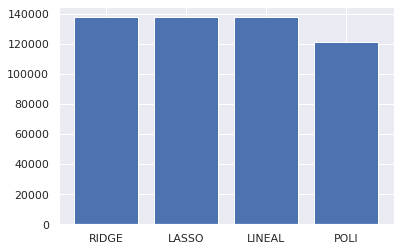

In [131]:
#Grafico de mae
nombres=list()
nombres.append('RIDGE')
nombres.append('LASSO')
nombres.append('LINEAL')
nombres.append('POLI')

plt.bar(nombres, lista_para_mae)
plt.show()

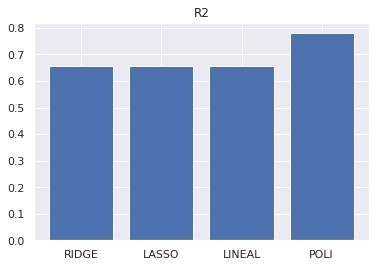

In [132]:
#Grafico de r cuadrada
nombres=list()
nombres.append('RIDGE')
nombres.append('LASSO')
nombres.append('LINEAL')
nombres.append('POLI')

plt.bar(nombres, lista_para_r2)
plt.title('R2')
plt.show()


### Conclusiones

-- Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

En el ejercicio 1 se puede observar que en el metódo polinomial tiene un MAE más bajo y R2 más alto, por lo que si el error es más bajo por consecuente el coeficiente de correlación debería de ser más alto.

Sin embargo, lo que está dando es 0.738 lo que aún es mejorable, para esto se podría aún revisar los datos, tomar más muestras, ver si hay clases desbalanceadas, entre otros.

En el segundo ejercicio de house_data el R2 o escore de predicción me ha dado 0.77 en la polinomial por encima de las otras tres, por lo que se puede también revisar en un grado polinomial mas alto para ver si mejora o no.